In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/399300-2005-2019-TT-PARAMTEST-20190518221407.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['BUY_N', 'SELL_N', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN_ALGO'] > md]
# df
md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['WINRATE_YEARLY'] > md]
df

heat_df = df.pivot(index='BUY_N', columns='SELL_N', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

NameError: name 'df' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-2005-2019-20190522.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

# RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-close-MAXN-DAYSK-2005-2019-20190524.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-YESTERDAYclose-TODAYopen-MAXN-DAYSK-20190525.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-BITCOIN-2017-2019-20190528.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-N-MAM-2011-2019-20190531-014218.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-BITCOIN-2017-2019-20190531-231521.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

1600

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,1,1,0.226802,0.231851,-0.463120,-0.469167,1.000000,0.444444,0.025790
1,1,0,2,1005,-0.091187,0.231851,-0.498952,-0.469167,0.596527,0.333333,-0.011840
2,1,0,3,732,0.165484,0.231851,-0.379338,-0.469167,0.612188,0.555556,0.019259
3,1,0,4,612,0.003487,0.231851,-0.330790,-0.469167,0.595357,0.333333,0.000434
4,1,0,5,524,-0.003925,0.231851,-0.335934,-0.469167,0.592664,0.333333,-0.000490


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1600.000000,1600.000000
mean,20.500000,0.0,20.500000,421.263750,2.117782,2.318511e-01,-0.406177,-4.691670e-01,0.578688,0.628611,0.141148
std,11.547005,0.0,11.547005,208.202142,1.245782,3.637117e-15,0.081897,1.321578e-14,0.025097,0.114442,0.062076
min,1.000000,0.0,1.000000,1.000000,-0.275070,2.318511e-01,-0.691068,-4.691670e-01,0.509506,0.222222,-0.039279
25%,10.750000,0.0,10.750000,278.000000,1.270614,2.318511e-01,-0.460397,-4.691670e-01,0.566550,0.555556,0.107551
50%,20.500000,0.0,20.500000,343.500000,2.056019,2.318511e-01,-0.400873,-4.691670e-01,0.579245,0.666667,0.149303
75%,30.250000,0.0,30.250000,494.000000,2.909217,2.318511e-01,-0.349982,-4.691670e-01,0.590082,0.666667,0.185100
max,40.000000,0.0,40.000000,1434.000000,9.882808,2.318511e-01,-0.183540,-4.691670e-01,1.000000,0.888889,0.346307


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
40,2,0,1,1170,7.158137,0.231851,-0.278000,-0.469167,0.611208,0.888889,0.298837
255,7,0,16,438,4.354028,0.231851,-0.183540,-0.469167,0.604598,0.777778,0.232452
294,8,0,15,418,4.369889,0.231851,-0.269982,-0.469167,0.575904,0.888889,0.232906
295,8,0,16,417,4.788337,0.231851,-0.184874,-0.469167,0.578692,0.888889,0.244484
319,9,0,1,357,4.482572,0.231851,-0.270251,-0.469167,0.657143,0.777778,0.236099
333,9,0,14,407,4.644404,0.231851,-0.264377,-0.469167,0.580645,0.888889,0.240587
334,9,0,15,398,4.866135,0.231851,-0.232749,-0.469167,0.589873,0.888889,0.246556
335,9,0,16,390,5.553586,0.231851,-0.204471,-0.469167,0.582902,0.888889,0.263883
375,10,0,16,408,5.533619,0.231851,-0.226214,-0.469167,0.589552,0.888889,0.263402
376,10,0,17,398,6.034589,0.231851,-0.252190,-0.469167,0.582697,0.888889,0.275083


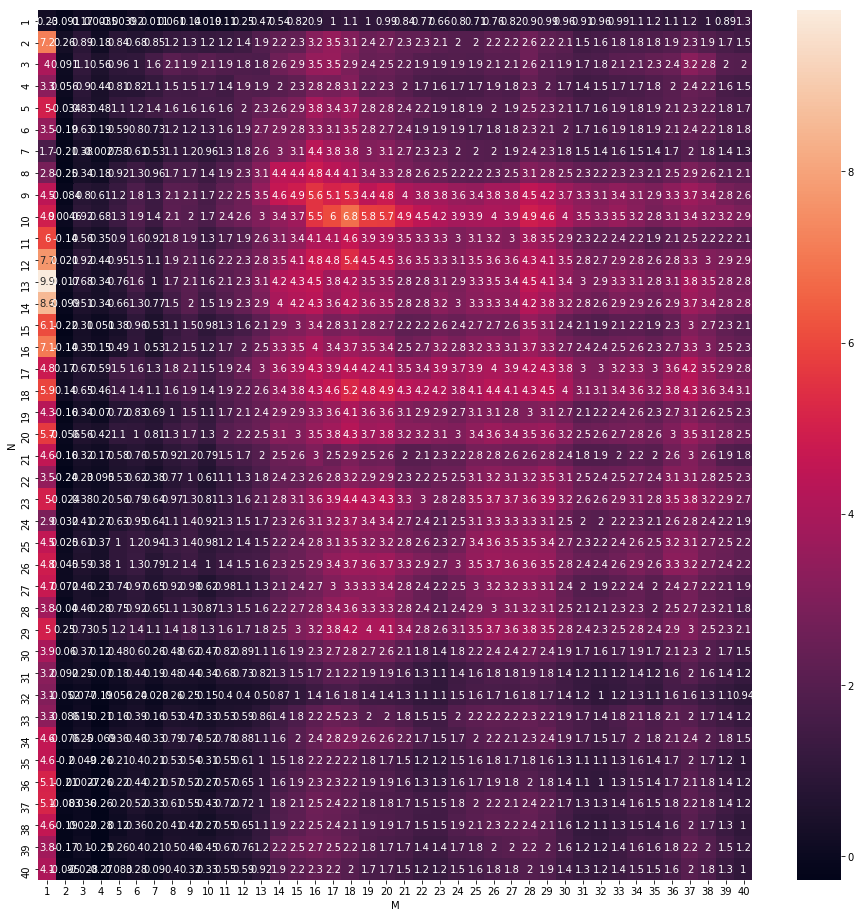

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-A-2011-2019-20190604-074241.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

900

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,1,1,0.643233,0.643828,-0.468979,-0.469167,1.000000,0.333333,0.096323
1,1,0,2,682,-0.122902,0.643828,-0.519367,-0.469167,0.575529,0.166667,-0.023988
2,1,0,3,494,0.112151,0.643828,-0.380751,-0.469167,0.603734,0.333333,0.019877
3,1,0,4,406,0.232887,0.643828,-0.334051,-0.469167,0.585859,0.333333,0.039526
4,1,0,5,348,0.223795,0.643828,-0.339861,-0.469167,0.596491,0.333333,0.038102


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,900.000000,900.0,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000,900.000000,900.000000
mean,15.500000,0.0,15.500000,399.295556,1.878397,6.438283e-01,-0.331565,-4.691670e-01,0.566498,0.592222,0.196176
std,8.660254,0.0,8.660254,184.171184,1.340471,3.443605e-15,0.099945,4.832155e-15,0.034839,0.201989,0.106127
min,1.000000,0.0,1.000000,1.000000,-0.313559,6.438283e-01,-0.631064,-4.691670e-01,0.486289,0.166667,-0.067292
25%,8.000000,0.0,8.000000,259.750000,0.834369,6.438283e-01,-0.407020,-4.691670e-01,0.542213,0.500000,0.118888
50%,15.500000,0.0,15.500000,351.500000,1.767785,6.438283e-01,-0.322691,-4.691670e-01,0.567079,0.666667,0.207437
75%,23.000000,0.0,23.000000,485.250000,2.549967,6.438283e-01,-0.253225,-4.691670e-01,0.590703,0.833333,0.264382
max,30.000000,0.0,30.000000,1049.000000,6.724246,6.438283e-01,-0.132797,-4.691670e-01,1.000000,1.000000,0.460137


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
598,20,0,29,234,4.523252,0.643828,-0.172686,-0.469167,0.506494,0.833333,0.372219
600,20,0,30,236,4.495051,0.643828,-0.174363,-0.469167,0.506438,0.833333,0.370919
612,21,0,13,287,4.587166,0.643828,-0.136886,-0.469167,0.610714,0.666667,0.375145
613,21,0,14,277,5.186078,0.643828,-0.132797,-0.469167,0.602941,0.666667,0.401319
614,21,0,15,263,5.895390,0.643828,-0.133060,-0.469167,0.619231,0.833333,0.429769
615,21,0,17,239,6.724246,0.643828,-0.154530,-0.469167,0.605932,0.833333,0.460137
616,21,0,16,252,6.209474,0.643828,-0.147442,-0.469167,0.604839,0.833333,0.441610
625,21,0,26,215,6.216149,0.643828,-0.168629,-0.469167,0.619718,0.666667,0.441857
626,21,0,27,212,6.433852,0.643828,-0.168767,-0.469167,0.623810,0.666667,0.449814
627,21,0,29,207,6.091181,0.643828,-0.168736,-0.469167,0.604878,0.666667,0.437200


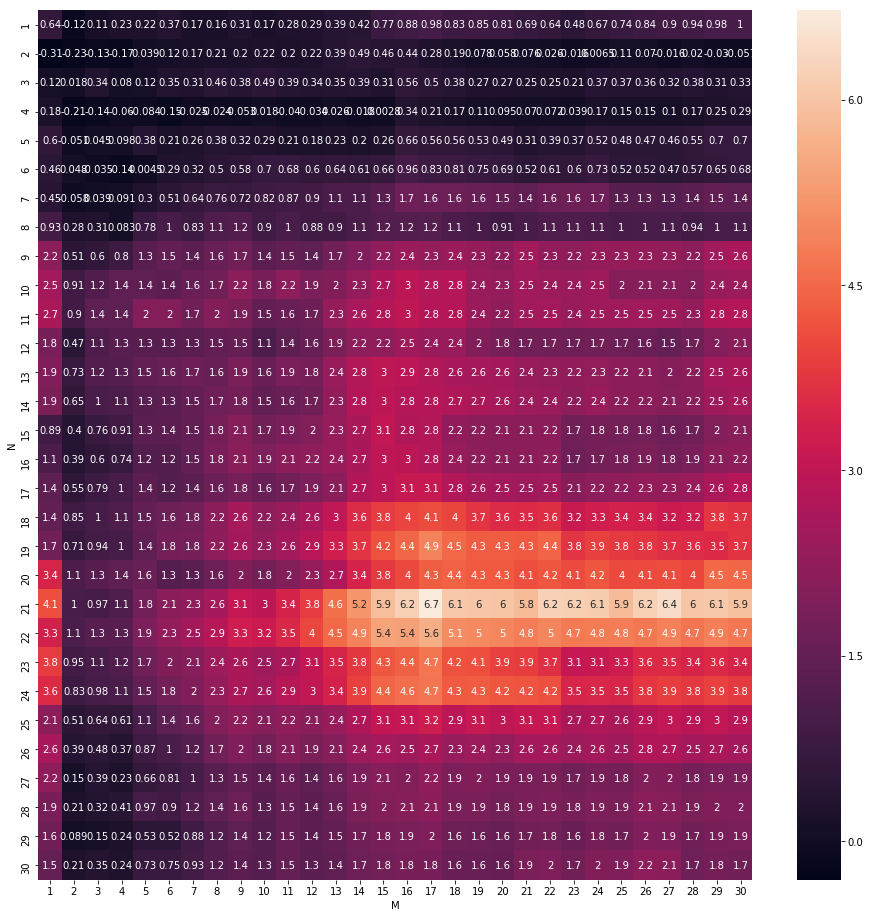

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-A-2014-2019-20190801-205215.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

900

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,1,1,0.604451,0.605011,-0.468979,-0.469167,1.000000,0.333333,0.091415
1,1,0,2,682,-0.122650,0.605011,-0.519367,-0.469167,0.576169,0.166667,-0.023919
2,1,0,3,494,0.112471,0.605011,-0.380751,-0.469167,0.604555,0.333333,0.019916
3,1,0,4,406,0.233241,0.605011,-0.334051,-0.469167,0.586902,0.333333,0.039551
4,1,0,5,348,0.224147,0.605011,-0.339861,-0.469167,0.597668,0.333333,0.038129


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,900.000000,900.0,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000,900.000000,900.000000
mean,15.500000,0.0,15.500000,419.246667,1.265012,6.050107e-01,-0.401491,-4.691670e-01,0.547191,0.496481,0.142241
std,8.660254,0.0,8.660254,185.134005,1.087316,9.775395e-15,0.071687,4.832155e-15,0.034507,0.187895,0.106881
min,1.000000,0.0,1.000000,1.000000,-0.550638,6.050107e-01,-0.665835,-4.691670e-01,0.472015,0.166667,-0.137573
25%,8.000000,0.0,8.000000,279.750000,0.470273,6.050107e-01,-0.447286,-4.691670e-01,0.525391,0.333333,0.073921
50%,15.500000,0.0,15.500000,370.000000,1.001285,6.050107e-01,-0.396780,-4.691670e-01,0.546586,0.500000,0.136969
75%,23.000000,0.0,23.000000,511.000000,2.015430,6.050107e-01,-0.351313,-4.691670e-01,0.568306,0.666667,0.226564
max,30.000000,0.0,30.000000,1046.000000,4.718213,6.050107e-01,-0.203373,-4.691670e-01,1.000000,0.833333,0.380733


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
389,13,0,30,326,3.276140,0.605011,-0.291956,-0.469167,0.533333,0.833333,0.308454
448,15,0,29,307,3.654074,0.605011,-0.291958,-0.469167,0.521595,0.833333,0.329119
449,15,0,30,307,4.146133,0.605011,-0.291958,-0.469167,0.531561,0.833333,0.354065


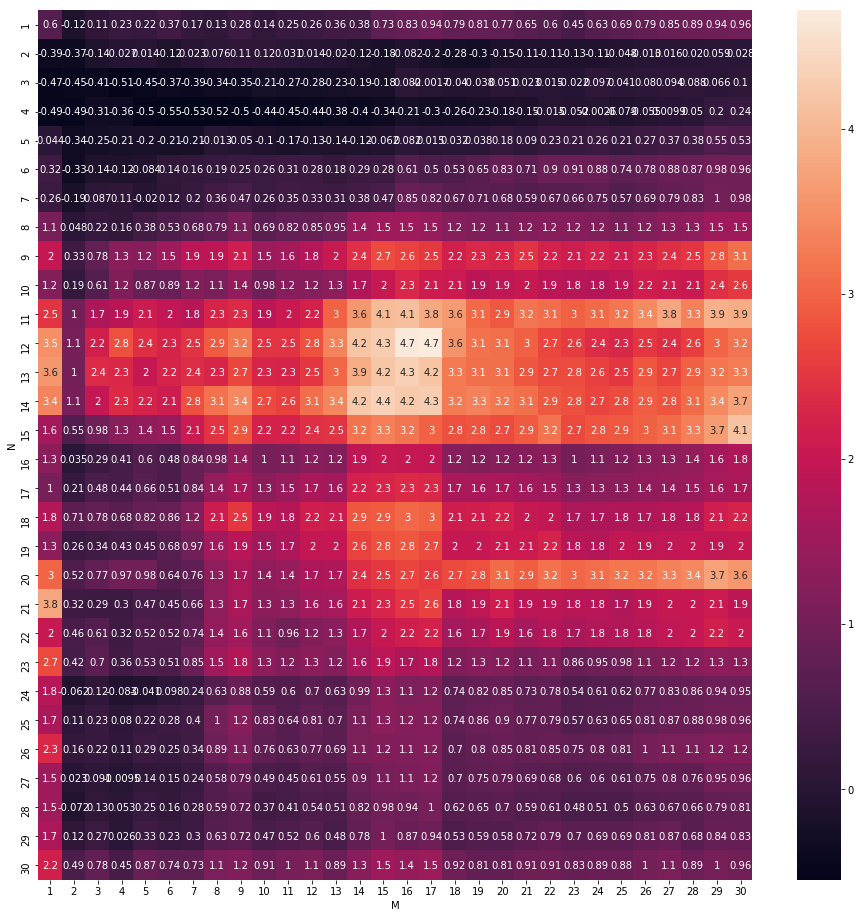

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-300CybSPOilGold-2014-2019-20190804-022311.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/BTCROTATION-2018-2019-20190604-145813.csv')
# len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
# df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
# ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/BTCROTAION-OKEX-2018-2019-20190604-175528.csv')
# len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
# df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
# ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-BITCOIN-HOURS-2019-2019-20190619-044927.csv')
# len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
# df.head()
# df['RETURN_ALGO'] = df['RETURN_ALGO'] * 1000000
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
# ax = sns.heatmap(heat_df, annot=True)

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,900.000000,900.0,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000
mean,15.500000,0.0,15.500000,180.700000,0.137710,9.286958e+00,-0.743891,-8.338312e-01,0.441596,3.333333e-01,-0.017460
std,8.660254,0.0,8.660254,77.797254,0.817188,1.901759e-13,0.122150,4.998781e-15,0.046053,4.443361e-16,0.202010
min,1.000000,0.0,1.000000,13.000000,-0.964978,9.286958e+00,-0.975825,-8.338312e-01,0.269841,3.333333e-01,-0.594014
25%,8.000000,0.0,8.000000,124.000000,-0.484719,9.286958e+00,-0.849327,-8.338312e-01,0.414167,3.333333e-01,-0.163327
50%,15.500000,0.0,15.500000,160.000000,0.002148,9.286958e+00,-0.733727,-8.338312e-01,0.438476,3.333333e-01,0.000577
75%,23.000000,0.0,23.000000,214.250000,0.524029,9.286958e+00,-0.641857,-8.338312e-01,0.473333,3.333333e-01,0.119992
max,30.000000,0.0,30.000000,559.000000,4.430341,9.286958e+00,-0.446525,-8.338312e-01,0.573529,3.333333e-01,0.576257


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
218,8,0,9,224,2.345987,9.286958,-0.583936,-0.833831,0.479452,0.333333,0.383781
251,9,0,12,208,4.430341,9.286958,-0.577238,-0.833831,0.468293,0.333333,0.576257
252,9,0,13,202,3.451121,9.286958,-0.570271,-0.833831,0.485000,0.333333,0.494175
253,9,0,14,201,2.478744,9.286958,-0.580046,-0.833831,0.462312,0.333333,0.398338
485,17,0,7,155,1.639712,9.286958,-0.581530,-0.833831,0.454545,0.333333,0.298299
486,17,0,6,167,1.797058,9.286958,-0.555000,-0.833831,0.469512,0.333333,0.318674
670,23,0,11,137,1.305340,9.286958,-0.579606,-0.833831,0.423358,0.333333,0.251858
671,23,0,12,124,1.514933,9.286958,-0.561141,-0.833831,0.419355,0.333333,0.281501
725,25,0,6,163,1.275070,9.286958,-0.562946,-0.833831,0.398773,0.333333,0.247416
727,25,0,8,144,2.628150,9.286958,-0.568471,-0.833831,0.405594,0.333333,0.414242


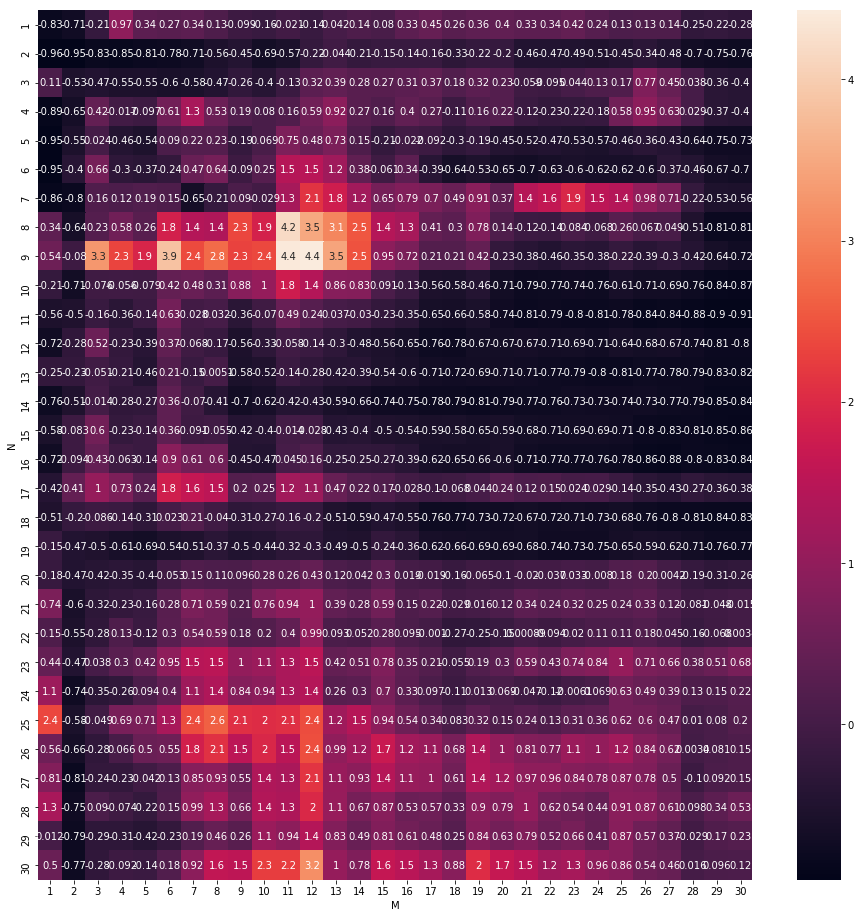

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-BEAR-BITCOIN-2017-2019-20190728-090656.csv')
# len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
# df.head()
# df['RETURN_ALGO'] = df['RETURN_ALGO'] * 1000000
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,900.000000,900.0,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000,9.000000e+02,900.000000
mean,15.500000,0.0,15.500000,159.293333,0.422438,9.286958e+00,-0.706517,-8.338312e-01,0.444723,3.333333e-01,0.029333
std,8.660254,0.0,8.660254,66.145763,1.143881,1.901759e-13,0.145133,4.998781e-15,0.042690,4.443361e-16,0.238411
min,1.000000,0.0,1.000000,13.000000,-0.966942,9.286958e+00,-0.974609,-8.338312e-01,0.269841,3.333333e-01,-0.600267
25%,8.000000,0.0,8.000000,112.000000,-0.485146,9.286958e+00,-0.833042,-8.338312e-01,0.422315,3.333333e-01,-0.163513
50%,15.500000,0.0,15.500000,145.000000,0.134976,9.286958e+00,-0.694118,-8.338312e-01,0.442905,3.333333e-01,0.034637
75%,23.000000,0.0,23.000000,190.000000,0.982737,9.286958e+00,-0.583350,-8.338312e-01,0.474260,3.333333e-01,0.202119
max,30.000000,0.0,30.000000,559.000000,5.715633,9.286958e+00,-0.378826,-8.338312e-01,0.553571,3.333333e-01,0.668936


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
209,8,0,1,100,2.407333,9.286958,-0.452081,-0.833831,0.515464,0.333333,0.390559
579,20,0,10,129,2.066562,9.286958,-0.494241,-0.833831,0.429688,0.333333,0.351705
580,20,0,11,130,2.211293,9.286958,-0.476485,-0.833831,0.410853,0.333333,0.368574
599,21,0,1,64,2.325297,9.286958,-0.473126,-0.833831,0.546875,0.333333,0.381475
725,25,0,7,127,3.188696,9.286958,-0.490734,-0.833831,0.433071,0.333333,0.469955
727,25,0,9,114,2.960755,9.286958,-0.499674,-0.833831,0.447368,0.333333,0.448000
729,25,0,10,109,2.921592,9.286958,-0.497844,-0.833831,0.403670,0.333333,0.444135
730,25,0,11,111,2.326047,9.286958,-0.517575,-0.833831,0.396396,0.333333,0.381558
731,25,0,12,105,2.282921,9.286958,-0.482654,-0.833831,0.413462,0.333333,0.376718
756,26,0,7,122,2.730627,9.286958,-0.502549,-0.833831,0.418033,0.333333,0.424876


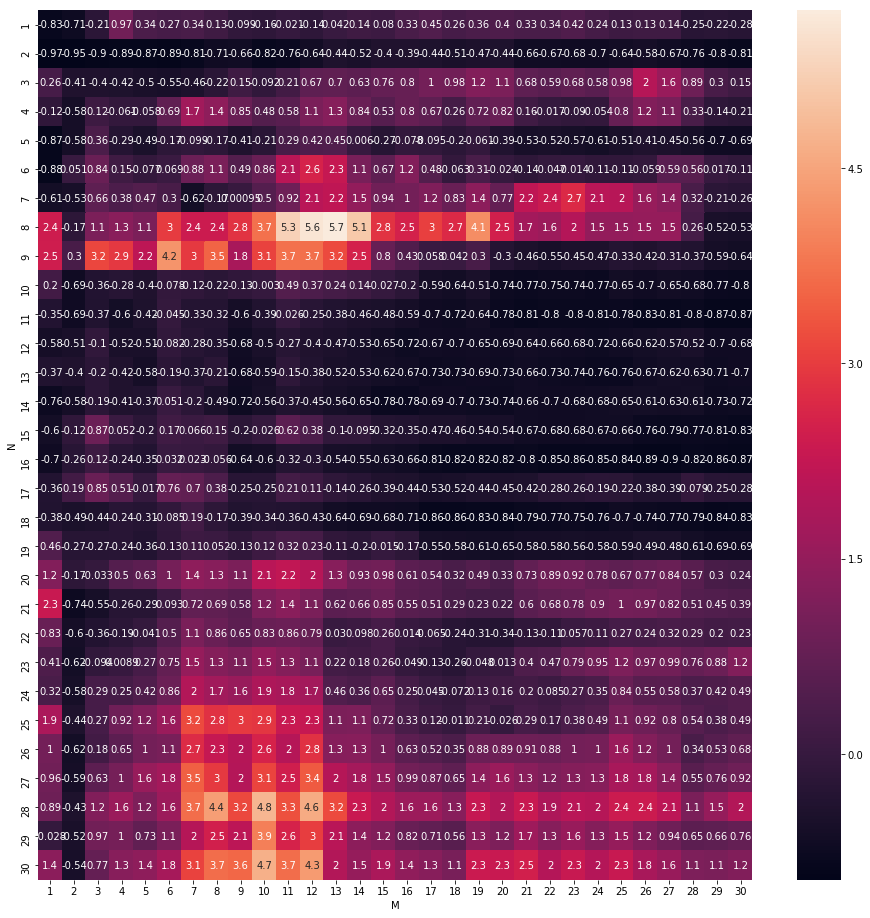

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-BEAR-BITCOIN-MINCHGLESSZERO-2017-2019-20190728-124501.csv')
# len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
# df.head()
# df['RETURN_ALGO'] = df['RETURN_ALGO'] * 1000000
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-MA-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-TT-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-MA-PARAMTEST-20190307.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

# md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN'] > md]
df[df['RETURN'] > df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)